In [ ]:
%matplotlib widget
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [ ]:
df=pd.read_csv('df_outputs_uni_TE_saopaulo.csv')

df

In [ ]:
df_ord = df.reindex([10,11,12,13,14,6,7,8,9,0,1,2,3,4,5]).reset_index(drop=True)
df_ord['cenarios'] = ['tmyx_2004_2018',
                      'try_base','try_2020','try_2050','try_2080',
                      'swera_base','swera_2020','swera_2050','swera_2080',
                      'annex80_2010','annex80_2050','annex80_2090',
                      'iag_2030','iag_2060','iag_2085']
df_ord

In [ ]:
scenarios_type_colors = ['#FF0000', # TMYx  
                    '#819FFF',  # TRY_base
                    '#3D6BFF',  # TRY_2020
                    '#003CFC',  # TRY_2050
                    '#001D76',  # TRY_2080
                    '#FFE491',  # SWERA_base
                    '#FFD248',  # SWERA_2020                               
                    '#FFC100',  # SWERA_2050
                    '#FF9250',  # SWERA_2080
                    '#22D900',  # ANNEX80_2010
                    '#1DB800',  # ANNEX80_2050
                    '#116E00',  # ANNEX80_2090     
                    '#64c4d2',  # IAG_2030
                    '#25BBD5',  # IAG_2060
                    '#1094ab',  # IAG_2085                                  
                   ]

In [ ]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
 
g=sns.barplot(x='cenarios', y='phft_uh', data=df_ord, palette=scenarios_type_colors)

plt.title("PHFT da Unidade Habitacional para os diferentes cenários")
plt.ylabel("PHFT (%)")
plt.xlabel("Cenários")
plt.xticks(rotation=45)
plt.show()

fig = g.get_figure()
fig.savefig('cenarios_PHFT.png', bbox_inches='tight', dpi=300) 

In [ ]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
 
g=sns.barplot(x='cenarios', y='suplimit_uh', data=df_ord, palette=scenarios_type_colors)

plt.title("PHsFTAPP (temp operativa acima de 26°C) para os diferentes cenários")
plt.ylabel("PHsFTAPP (%)")
plt.xlabel("Cenários")
plt.xticks(rotation=45)
plt.show()

fig = g.get_figure()
fig.savefig('cenarios_PHsFTAPP.png', bbox_inches='tight', dpi=300) 

In [ ]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
 
g=sns.barplot(x='cenarios', y='inflimit_uh', data=df_ord, palette=scenarios_type_colors)

plt.title("PHiFTAPP (temp operativa abaixo de 18°C) para os diferentes cenários")
plt.ylabel("PHiFTAPP (%)")
plt.xlabel("Cenários")
plt.xticks(rotation=45)
plt.show()

fig = g.get_figure()
fig.savefig('cenarios_PHiFTAPP.png', bbox_inches='tight', dpi=300) 

In [ ]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
 
g=sns.barplot(x='cenarios', y='cgtr_uh', data=df_ord, palette=scenarios_type_colors)

plt.title("CgTRAPP para os diferentes cenários")
plt.ylabel("CgTRAPP (kWh/ano)")
plt.xlabel("Cenários")
plt.xticks(rotation=45)
plt.show()

fig = g.get_figure()
fig.savefig('cenarios_CgTRAPP.png', bbox_inches='tight', dpi=300) 

In [ ]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
 
g=sns.barplot(x='cenarios', y='cgta_uh', data=df_ord, palette=scenarios_type_colors)

plt.title("CgTAAPP para os diferentes cenários")
plt.ylabel("CgTAAPP (kWh/ano)")
plt.xlabel("Cenários")
plt.xticks(rotation=45)
plt.show()

fig = g.get_figure()
fig.savefig('cenarios_CgTAAPP.png', bbox_inches='tight', dpi=300) 

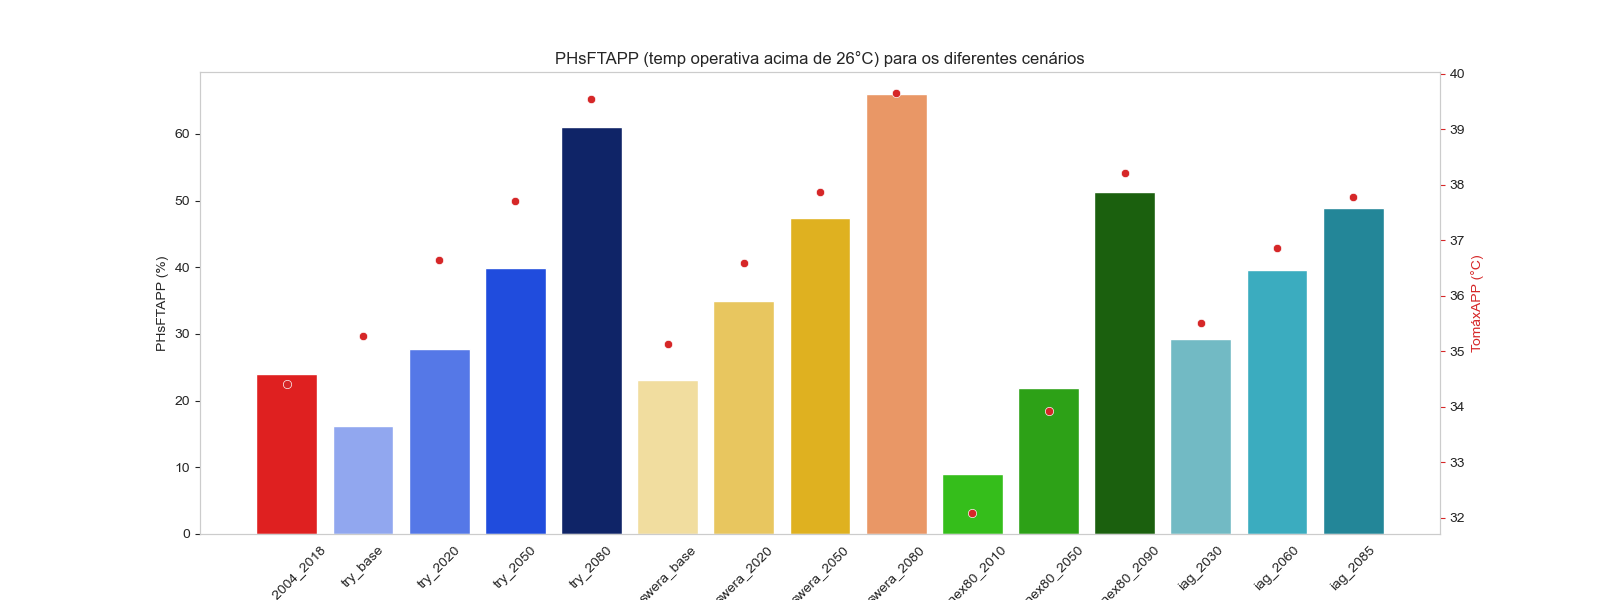

In [75]:
sns.set_style("whitegrid", {'axes.grid' : False})
#Create combo chart
fig, ax1 = plt.subplots(figsize=(16,6))
#bar plot creation
ax1.set_title('PHsFTAPP (temp operativa acima de 26°C) para os diferentes cenários')
ax1 = sns.barplot(x='cenarios', y='suplimit_uh', data = df_ord, palette=scenarios_type_colors)
ax1.tick_params(axis='y')
plt.xlabel("Cenários")
plt.xticks(rotation=45)

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#point plot creation
ax2.set_ylabel('TomáxAPP (°C)',color=color)
ax2 = sns.scatterplot(x='cenarios', y='tempopmax_uh', data = df_ord, color=color)
ax2.tick_params(axis='y', color=color)
ax1.set_ylabel('PHsFTAPP (%)')

#show plot

plt.show()
fig.savefig('cenarios_PHsFTAPP_TempOMax.png', bbox_inches='tight', dpi=300) 
sns.set_style("ticks")

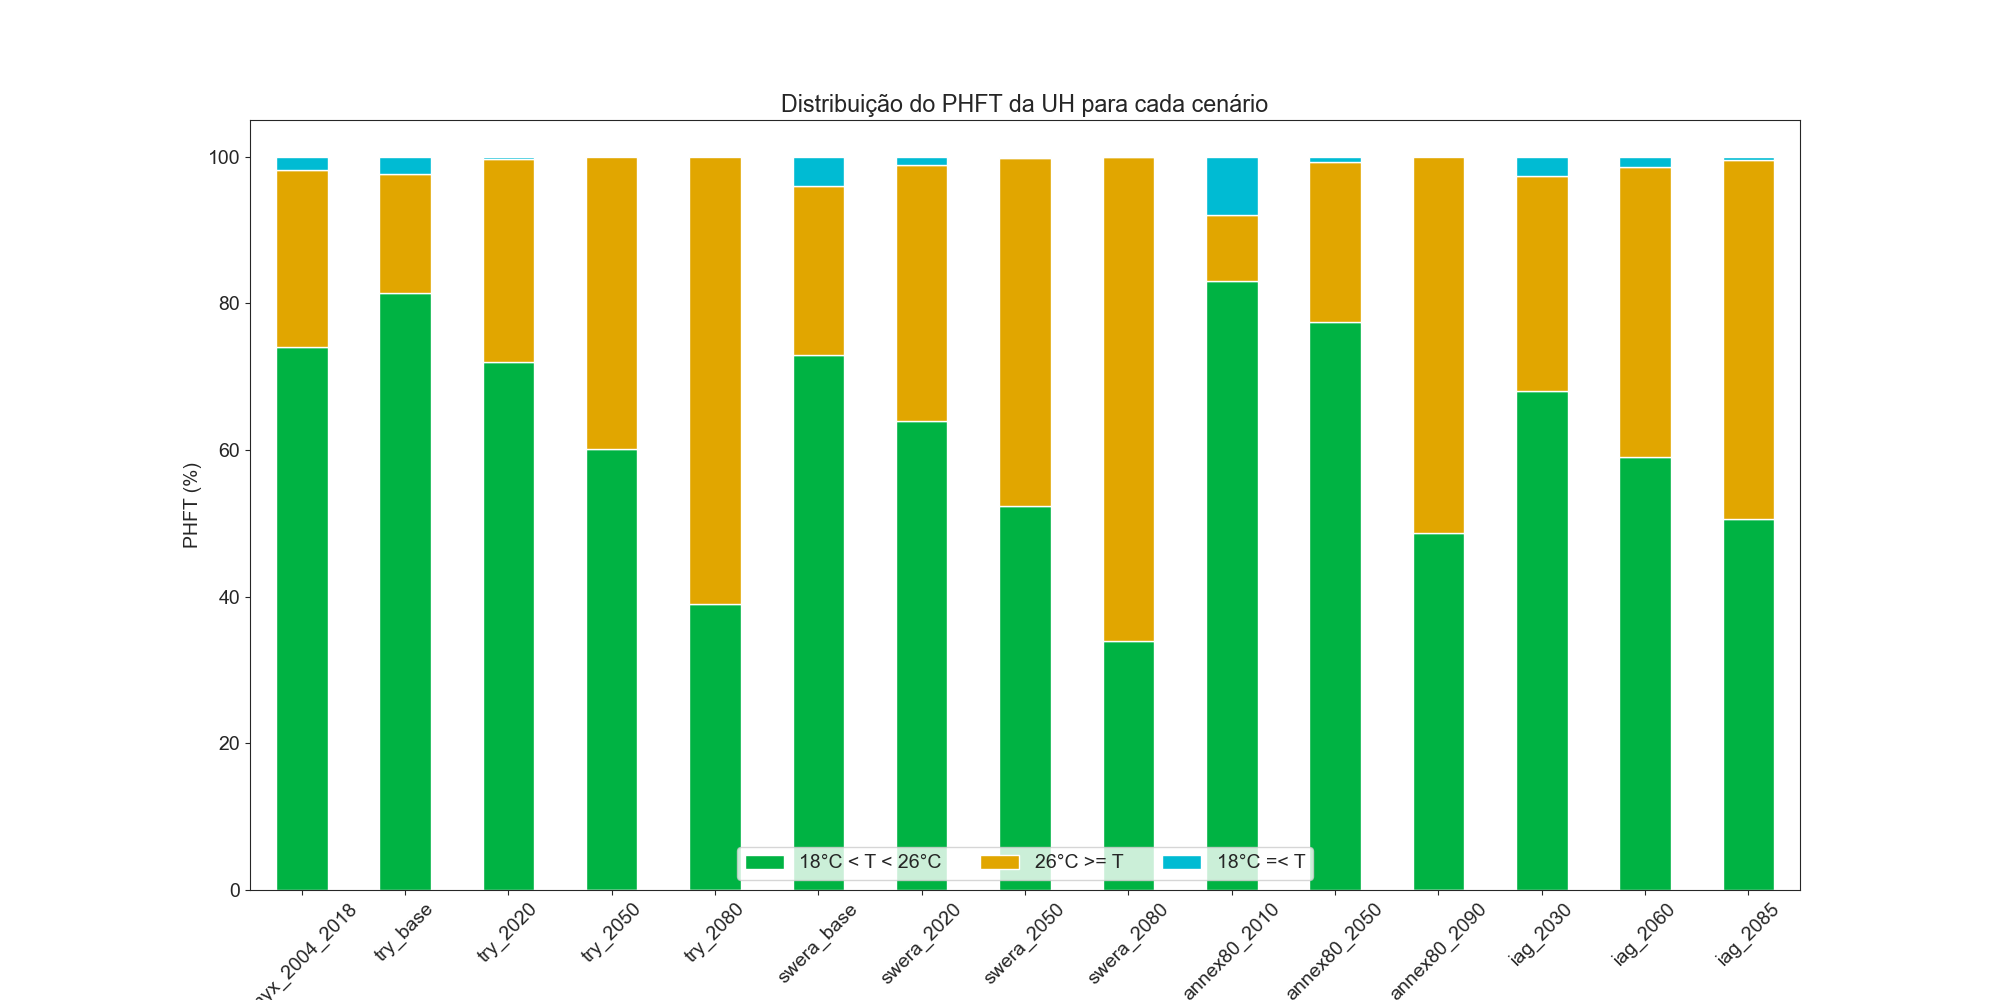

In [85]:
df_stacked = df_ord.iloc[: , [23, 24, 25, 35]]
df_stacked.columns = ['18°C < T < 26°C', '26°C >= T', '18°C =< T', 'Cenários']

sns.set_style("ticks")
plt.rcParams.update({'font.size': 14})
df_stacked.plot(x='Cenários', kind="bar", color=['#00B343', '#E1A600', '#00BBD3'], figsize=(20,10), stacked=True).legend(
    loc='lower center', ncol=3)

plt.title("Distribuição do PHFT da UH para cada cenário")
plt.xlabel("Cenários")
plt.xticks(rotation=45)
plt.ylabel("PHFT (%)")

plt.savefig('cenarios_PHFTAPP_distribuition.png', bbox_inches='tight', dpi=300) 